**<center><font size=6>CS490: Machine Learning<br>Homework 5</font></center>**

<hr> 

In this assignment, you will be using decision trees, ensembles, and clustering to look at a dataset. 

Before we get started, let's include all of our libraries:

In [1]:
import numpy as np
np.random.seed(0)
import mltools as ml
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<hr>

## Part 1: Decision Trees

The first learner we are going to look at are decision trees. In this problem, we will use our Kaggle in-class competition data to test decision trees on real data. We will be using the Boolean-valued classification given in column 1 of the Y data, rather than the real valued score in column 0. To enable us to do model selection, we will be splitting our  data into training and validation sets of roughly equal size. 

In [2]:
X = np.genfromtxt('data/X_train.txt', delimiter=None) 
Y = np.genfromtxt('data/Y_train.txt', delimiter=None) 

X,Y = ml.shuffleData(X[1:],Y[1:,1:])
print(X.shape)
# split into training and validation
[Xtr,Xva,Ytr,Yva] = ml.splitData(X,Y,0.50) 

(4776, 46)


**Print the minimum, maximum, mean, and variance of each of the first 5 features. <span style="color: deepskyblue;">(5 points)</span>**

In [112]:
# TODO: print min, max, mean, and variance of first 5 features
min = np.min(X[:, :5], axis=0)
max= np.max(X[:,:5],axis=0)
print("MAX: ", max)
print("MIN: ", min)
mean = np.mean(X[:,:5], axis=0)
var = np.var(X[:,:5], axis=0)
print("MEAN: ", mean)
print("VAR: ", var)


MAX:  [9.90246363e+12 1.81297000e+01 1.00000000e+00 1.00000000e+00
 5.40042159e+01]
MIN:  [1.2008000e+04 7.5385000e+00 0.0000000e+00 0.0000000e+00 1.7874552e-02]
MEAN:  [4.77971505e+12 1.30983246e+01 4.36348409e-01 7.29271357e-01
 2.30044961e+00]
VAR:  [7.06712779e+24 2.59926824e+00 2.45948475e-01 1.97434645e-01
 2.57222627e+00]


Now we can learn a decision tree classifier from the training data using the method implemented in the `mltools` package (this may take a minute). Set the maximum tree depth to 50 to avoid potential recursion limits or memory issues. 


**Learn a decision tree classifier and compute and report your decision tree’s training and validation error rates.<span style="color: deepskyblue;">(5 points)</span>**

In [113]:
# TODO: learn a decision tree with max depth 50
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50)
learner.train(Xtr,Ytr,maxDepth=50)
train_prec = learner.predict(Xtr)
val_prec = learner.predict(Xva)

# TODO: compute and report the learner's training and validation error rates
T_error = 1- np.mean(Ytr== train_prec)
V_error= 1- np.mean(Yva== val_prec)

print("Train errror Rate:", T_error)
print("Validation error rate:",V_error)
# TODO: compute and report the learner's training and validation error rates

Train errror Rate: 0.0
Validation error rate: 0.025544388609715196


Now try varying the `maxDepth` parameter, which forces the tree learning algorithm to stop after at most that many levels. 

**Test `maxDepth` values in the range `[0,1,2,...,15]`, and plot the training and validation error rates versus `maxDepth`. Do models with higher `maxDepth` have higher or lower complexity? What choice of `maxDepth` provides the best decision tree model? <span style="color: deepskyblue;">(10 points)</span>**

Models with higher maximum depth would be more complex, as the tree makes decisions for more levels. Mpre decisions means a more robust tree, and it can get much more specific as the levels increase. A stump would be the least complex decision tree, while a maxDepth of 20 is a gigantic tree that can tell you a lot more since it not restricted by only one X value. I saw the best decision tree model with a maxDepth of 7. It has the lowest error on validation data and is still very close to the lowest on training. 

[0. 0. 0. ... 0. 0. 0.]


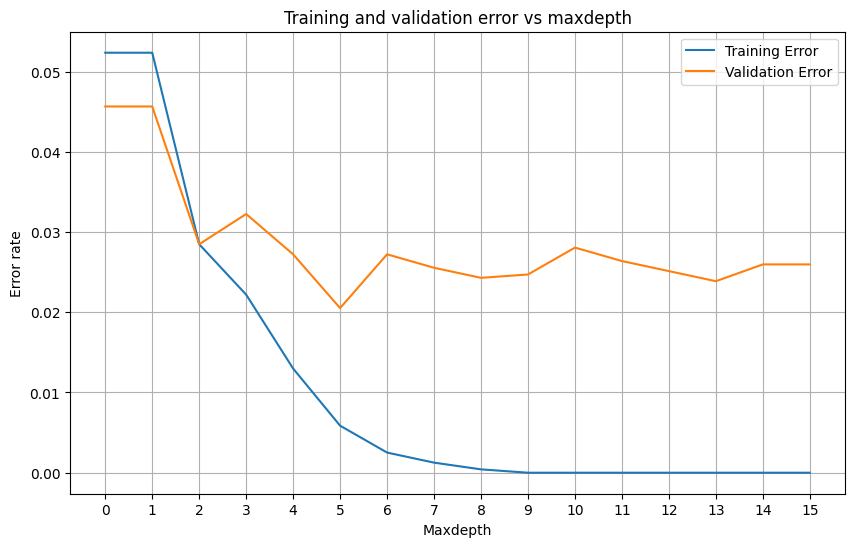

In [102]:
# TODO: learn decision trees with max depth ranging from 0 to 15 
# TODO: learn decision trees with max depth ranging from 0 to 15 
train_error =[]
val_error=[]
max_depth_vals = list(range(16))
for max_depth in max_depth_vals:
    learner=  ml.dtree.treeClassify()
    learner.train(Xtr,Ytr,maxDepth=max_depth)
    train_prec = learner.predict(Xtr)
    val_prec = learner.predict(Xva)
    T_error = 1-np.mean(Ytr== train_prec)
    V_error= 1-np.mean(Yva== val_prec)
    train_error.append(T_error)
    val_error.append(V_error)
print(Ytr)
# TODO: plot the training and validation error versus maxDepth
plt.figure(figsize=(10,6))
plt.plot(max_depth_vals,train_error,label="Training Error")
plt.plot(max_depth_vals,val_error, label="Validation Error")
plt.title("Training and validation error vs maxdepth")
plt.xlabel("Maxdepth")
plt.ylabel("Error rate")
plt.xticks(max_depth_vals)
plt.legend()
plt.grid("true")
plt.show()

# TODO: plot the training and validation error versus maxDepth

 The `minParent` parameter controls the complexity of decision trees by lower bounding the amount of data required to split nodes when learning. 
 
**Fixing `maxDepth=50`, compute and plot the training and validation error rates for `minParent` values in the range $2^{[0...12]} =$ `[1,2,4,8,...,4096]`. Do models with higher `minParent`
have higher or lower complexity? What choice of `minParent` provides the best decision tree model? <span style="color: deepskyblue;">(10 points)</span>**

Models with higher minParents have lower complexity. A smaller minParent would result in more branches made. If we start with a high minParent value,nthe threshold to split off is higher, so we will have less branching of the tree. The best minParent value I found was 8. It has the lowest validation error, and the overall lowest training error (minParent of 4) is relatively close to 8's value. 

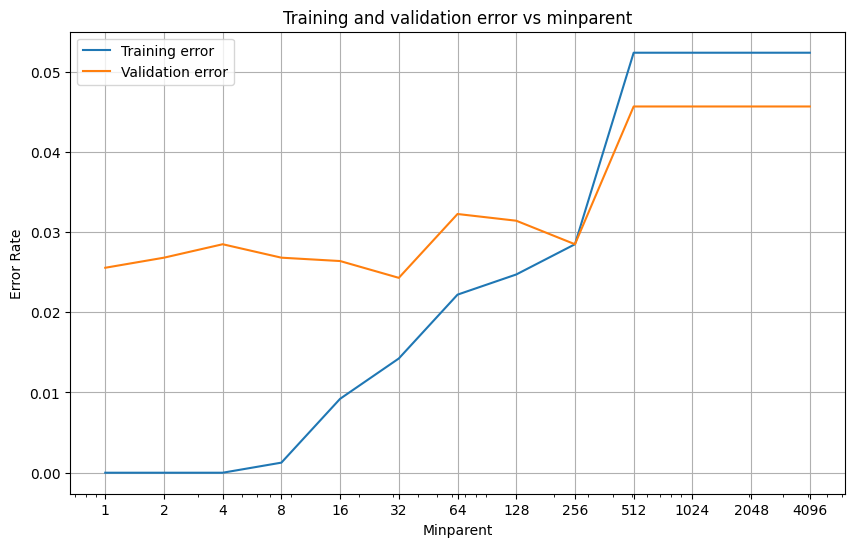

In [114]:
# TODO: learn a decision trees with maxParent ranging from 2^0 to 2^12, 
# increasing by powers of 2
# TODO: learn a decision trees with maxParent ranging from 2^0 to 2^12, 
# increasing by powers of 2
train_error =[]
val_error=[]
min_par_vals = [2**i for i in range(13)]
for min_parents in min_par_vals:
    learner= ml.dtree.treeClassify()
    learner.train(Xtr,Ytr,minParent = min_parents, maxDepth=50)
    #ytrain hat
    train_prec = learner.predict(Xtr)
    #yvalhat
    val_prec = learner.predict(Xva)
    T_error = 1- np.mean(Ytr== train_prec)
    V_error= 1- np.mean(Yva== val_prec)
    train_error.append(T_error)
    val_error.append(V_error)
 
# TODO: plot the training and validation error versus maxDepth
plt.figure(figsize=(10,6))
plt.plot(min_par_vals,train_error,label="Training error")
plt.plot(min_par_vals,val_error, label="Validation error")
plt.title("Training and validation error vs minparent")
plt.xlabel("Minparent")
plt.ylabel("Error Rate")
plt.xscale("log")
plt.xticks(min_par_vals,labels=[str(val) for val in min_par_vals])
plt.legend()
plt.grid("true")
plt.show()

# TODO: plot the training and validation error versus maxDepth

We can understand our model’s performance as we vary our preference for false positives compared to false negatives using the ROC curve, or summarize this curve using a scalar area under curve (AUC) score. 

**For the best decision tree model trained in the previous parts, use the `roc` function to plot an ROC curve summarizing your classifier performance on the training points, and another ROC curve summarizing your performance on the validation points. Then using the `auc` compute and report the AUC scores for the training and validation data. <span style="color: deepskyblue;">(10 points)</span>**

Training AUC Score is:  0.9999681838267785
Validation AUC Score is:  0.9702891578875331


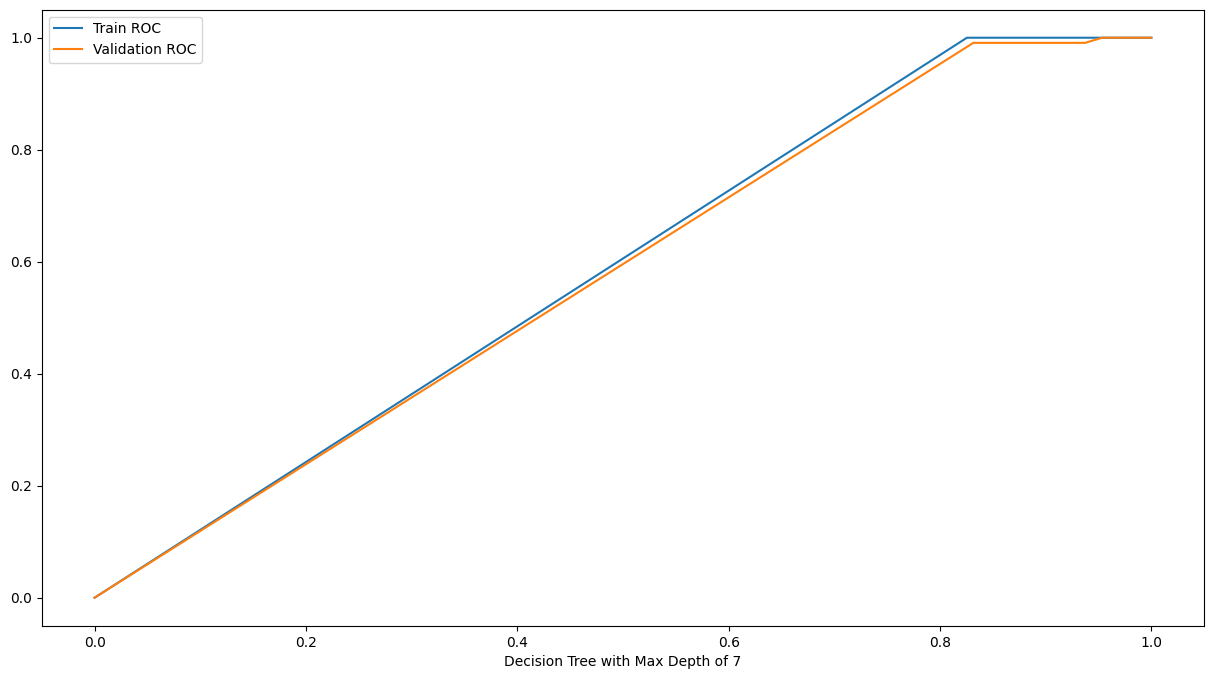

In [115]:
# TODO: compute and plot ROC curves for training and validation
# TODO: compute and plot ROC curves for training and validation
learner= ml.dtree.treeClassify(Xtr, Ytr, maxDepth = 7)
#y train hat
train_prob = learner.predict(Xtr)
#y val hat
val_prob = learner.predict(Xva)

trainRoc = learner.roc(Xtr,Ytr)
valRoc = learner.roc(Xva, Yva)
# splitting tuple for plotting 
xRoc = trainRoc[0]
yRoc = trainRoc[1]
## now validation
xvalRoc = valRoc[0]
yvalRoc = valRoc[1]
roc_auc_train = learner.auc(Xtr,Ytr)
roc_auc_val= learner.auc(Xva, Yva)
print("Training AUC Score is: ", roc_auc_train)
print("Validation AUC Score is: ", roc_auc_val)
plt.figure(figsize=(15, 8))
plt.plot(xRoc,yRoc, label = "Train ROC")
plt.plot(xvalRoc,yvalRoc, label = "Validation ROC")
plt.xlabel("Decision Tree with Max Depth of 7")
plt.legend()
plt.show()

Training AUC Score is:  0.999019001325674
Validation AUC Score is:  0.9214728816356763


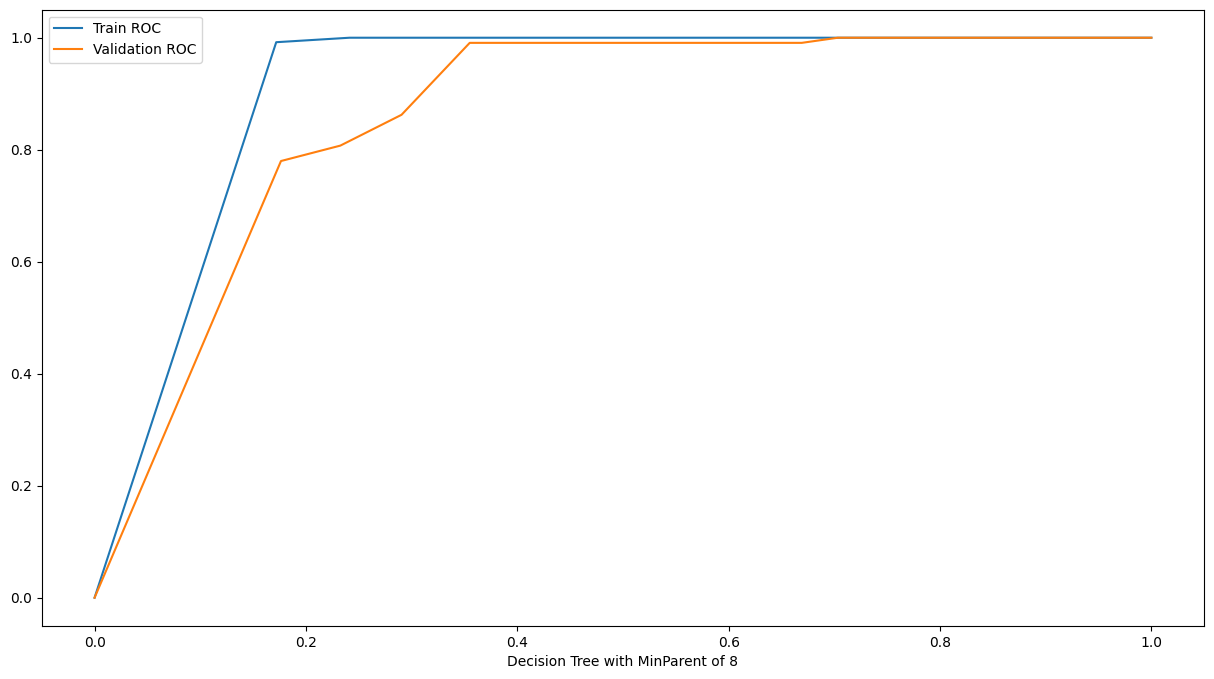

In [116]:
# plotting best Minparent when MaxDepth is 50 rocCurve, values taken from best model above
minParent = 8
learner= ml.dtree.treeClassify(Xtr, Ytr, maxDepth = 50, minParent = 8)
#y train hat
train_prob = learner.predict(Xtr)
#y val hat
val_prob = learner.predict(Xva)

trainRoc = learner.roc(Xtr,Ytr)
valRoc = learner.roc(Xva, Yva)
# splitting tuple for plotting 
xRoc = trainRoc[0]
yRoc = trainRoc[1]
## now validation
xvalRoc = valRoc[0]
yvalRoc = valRoc[1]
roc_auc_train = learner.auc(Xtr,Ytr)
roc_auc_val= learner.auc(Xva, Yva)
print("Training AUC Score is: ", roc_auc_train)
print("Validation AUC Score is: ", roc_auc_val)
plt.figure(figsize=(15, 8))
plt.plot(xRoc,yRoc, label = "Train ROC")
plt.plot(xvalRoc,yvalRoc, label = "Validation ROC")
plt.xlabel("Decision Tree with MinParent of 8")
plt.legend()
plt.show()

Based on your results in the previous parts, pick `maxDepth` and `minParent` values that you think will perform well. 

**Retrain your decision tree model using all the data in `X_train.txt`. Score your performance on the full dataset (error rate and AUC).<span style="color: deepskyblue;">(10 points)</span>**

In [118]:
# TODO: retrain your "best" classifier on the whole training dataset

# TODO: retrain your "best" classifier on the whole training dataset
maxDepth=7
minParent=8
bestc  la = ml.dtree.treeClassify()
bestcla.train(X, Y, minParent, maxDepth)
fullpred = bestcla.predict(X)
full_error_rate= 1- np.mean(Y== fullpred)
full_auc = bestcla.auc(X,Y)


# TODO: compute error and AUC 
print("error rate on full dataset:", full_error_rate)
print ("AUC on full dataset:", full_auc)


# TODO: compute error and AUC 

error rate on full dataset: 0.00335008375209378
AUC on full dataset: 0.9997741873567502


Using code like the following, you can make predictions on the test points (feature vectors found in `X_test.txt`), and export your predictions in the format required by Kaggle:

In [107]:
# Load X_test.txt
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)

# Predict a probability of class 1
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T 

# Output a file with two columns, a unique ID and a probability of class 1
np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header='Unique Id,DIST',delimiter=',')

STATEMENT OF COLLABORATION: Steve originally worked on this and sent it to us and parts did not run, the graphs werent right and had no questions answered. Jake and I worked on it together in a call to fix everything. We also talked to Matt about roc curves Thursday night because we could not get ours to work for the life of us. We didnt realize it was a tuple so it was doing all kinds of strange errors. 

Note that we use `predictSoft` to output probabilistic predictions (that test examples are members of class 1) for upload to Kaggle. While you may also use “hard” predictions (class values), accounting for the learned model’s confidence in each prediction will produce a smoother ROC curve and (usually) a better AUC score.

<hr>

## Part 2: Ensembles

Now we will use our decision trees to create ensembles, hopefully improving performance. You can choose either part of this question to answer (your choice): a random forest classifier, which is a bagged ensemble of decision trees; or a boosted ensemble of regression trees learned with gradient boosting.
In Python, it is easy to keep a list of different learners, even of different types, for use in an ensemble predictor:

In [20]:
# ensemble[i] = ml.treeClassify(Xb,Yb,...) # save ensemble member "i" in a cell array
# ...
# ensemble[i].predict(Xv,Yv); # find the predictions for ensemble member "i"

<hr>

### Option 1: Random Forests

Random Forests are bagged collections of decision trees, which select their decision nodes from randomly chosen subsets of the possible features (rather than all features). You can implement this easily in `treeClassify` using option `nFeatures`=k, where k is the number of features to select from (e.g., k = 15 or k = 25 if there are 35 features); you’ll write a for-loop to build the ensemble members, and another to compute the prediction of the ensemble.

**Using your training/validation split from above, learn a bagged ensemble of decision trees on the training data and plot the training and validation error as a function of the number of learners in the ensemble for (at least) 1, 5, 10, and 25 learners. <span style="color: deepskyblue;">(20 points)</span>** 

For your individual learners, use little complexity control (depth cutoff 15+, minLeaf 4, etc.), since the bagging will be used to control overfitting instead. For the bootstrap process, draw the same number of data as in your training set after the validation split (M′ = M in the pseudocode). You may find ml.bootstrapData() helpful, although it is very easy to do yourself. When computing your performance, you may find it more computationally efficient to simply learn 25 ensemble members first, and then evaluate the results using only a few of them; this will give the same results as only learning the few that you need and you can keep reusing models as needed.



In [ ]:
M = Xtr.shape[0] # Number of training points
Mv= Xva.shape[0] # Number of validation points

# set up our random forest
rforest = [None]*25

# Predictions on training and validation data
YtHat = np.zeros((M,25))
YvHat = np.zeros((Mv,25))


for l in range(25):
    Xi,Yi = ml.bootstrapData(Xtr,Ytr, M)    # draw this member's random sample of data
    
    # TODO: learn a decision tree classifier rforest[l] using maxDepth = 15 and
    # nFeatures = some subset of the number of X features
    

    # TODO: predict the values for YtHat and YvHat (using either predict to get
    # class values 1 or 0 or using predictSoft to get a proability of class 1)
   
    
    
# combine these learners in different ensembles and compute the error
for l in [1,5,10,15]:
    # Make the prediction (mean of columns 0...l-1) and score the MSE for
    # training and validation 
   
    

You can now choose an ensemble that performed well, train it on the full `X_train.txt` and submit its results for `X_test.txt` to Kaggle!

<hr>

### Option 2: Gradient Boosting

Gradient boosted trees are boosted collections of decision trees, which are built sequentially to predict the residual error in the current ensemble. You’ll write a for-loop to build the ensemble members, and another to compute the prediction of the ensemble.
Since this is a classification problem, we will do gradient boosting on a logistic negative log likelihood loss, i.e., we will regress the log-odds ratio in a manner similar to logistic regression (except that, instead of a linear regression on the log-odds, we will use a collection of decision trees). Use `treeRegress` to fit each learner to the (real-valued) log-odds update; treeRegress works analagously to `treeClassify`.

In practice, start out with a baseline predictor $f(x) = 0$, and compute probabilies $p(y = 1) = \sigma(f(x))$ where $\sigma$ is the usual logistic function. Then, update $f(x)$ by regressing the derivative of $J$:

\begin{equation*}
\frac{dJ^{(i)}}{df^{(i)}} = \begin{cases} 1-\sigma(f(x^{(i)})) & y^{(i)}=1 \\
-\sigma(f(x^{(i)})) & y^{(i)}=0 \end{cases}
\end{equation*}

Fit $dJ$ using a regression tree $t(x)$, and update $f(x) = f(x) + \alpha t(x)$ for some step size $\alpha$.

**Using your training/validation split from above, learn a gradient boosted ensemble of decision trees on the training data and plot the training and validation error as a function of the number of learners in the ensemble for (at least) 1, 5, 10, and 25 learners. <span style="color: deepskyblue;">(20 points)</span>** 

For your individual learners, use very strong complexity control (depth cutoff 2–3, or large minParent, etc.), since the boosting process will be adding complexity to the overall learner. When computing your performance, you may find it more computationally efficient to simply learn 25 ensemble members first, and then evaluate the results using only a few of them; this will give the same results as only learning the few that you need and you can keep reusing models as needed.


In [ ]:
M = Xtr.shape[0] # Number of training points
Mv= Xva.shape[0] # Number of validation points

nEns = 50   # size of the ensemble
ensemble = [None]*nEns # Set up the ensemble

# Predictions on training and validation data
YtHat = np.zeros((M,nEns))
YvHat = np.zeros((Mv,nEns))

# Define our logistic sigmoid function
def sigma(z): return np.exp(-z)/(1.+np.exp(-z))


f = np.zeros(Ytr.shape)
alpha = 1   # set step size

for l in range(nEns):             # this is a lot faster than the bagging loop:
   # calculate gradient for this learner
    dJ = 1.*Ytr - sigma(f)   
    
    # TODO: learn a decision tree classifier ensemble[l] using maxDepth = 3
    
    
    # TODO: Update f(x) for the next learner by subtracting out the values predicted by
    # the current learner * step size
    
    
    
    # TODO: predict the values for YtHat and YvHat 
   
 
    
# Now predict for various numbers of boosted learners:
for l in [1,5,10,25,nEns]:
    # Prediction on the training data
    pT = sigma(YtHat[:,0:l].sum(axis=1))
    
    # TODO: Prediction on validation data
    
    # Negative Log-likelihood for training data
    nllT = -(np.log(pT)*Ytr + np.log(1-pT)*(1-Ytr)).mean()
    
    # TODO: nll on validation data
    
    
    # Error on training data (on average how often was the prediction above 0.5, which
    # would round up to a class of 1)?
    errT = (Ytr != (pT>.5)).mean()
    
    # TODO: Validation error

You can now choose an ensemble that performed well, train it on the full `X_train.txt` and submit its results for `X_test.txt` to Kaggle!

<hr>

## Part 3: Clustering

In this problem, you will experiment with two clustering algorithms implemented in the updated `mltools` package: k-means and agglomerative clustering. 

**Load the standard Iris dataset, select the first two features, and ignore the class (or Y) variables. Plot the data and see for yourself how “clustered” you think it looks. Include the plot, say how many clusters you think exist, and briefly explain why. (There are multiple reasonable answers to this question.) <span style="color: deepskyblue;">(5 points)</span>** 


In [ ]:
# Data Loading--Just load the first 2 classes 
iris = np.genfromtxt("iris.txt",delimiter=None)  # load the text file
X = iris[:,0:2]            # features are the other columns; only use the first 2


# TODO: Plot the Iris Data and visually inspect the data



**Run k-means on the first two features of the Iris data, for k = 2, k = 5, and k = 20. Try multiple (at least 5) different initializations for each k, and check to see whether they find the same solution; if not, pick the one with the best score. For the best clustering for each candidate k, create a plot with the data colored by assignment, and the cluster centers. You can plot the points colored by cluster assignments z using
ml.plotClassify2D(None,X,z) . (You will need to also plot the cluster centers yourself.) <span style="color: deepskyblue;">(10 points)</span>** 

In [ ]:
# k-means, k=2

# initialize the error (sum of squares distance from all points to their cluster center)
# to infinity
ssd = np.inf

# train with 5 different initializations
for it in range(5):
    
    # TODO: run kmeans for this iteration 
    # returns Zi: array of cluster values for each X for iteration i, 
    # mui: mean of clusters found by iteration i, and
    # ssdi = sum of squares error for iteration i
    
    
    # If this initialization produced an overall better clustering than our best so far,
    # save this one as the best
    if ssdi < ssd:
        Z,mu,ssd = Zi,mui,ssdi
        
# Now, plot the data and their cluster ID as color:
ml.plotClassify2D(None,X,Z)
plt.scatter(mu[:,0], mu[:,1], c='r', marker='x')

In [ ]:
# TODO: Repeat for k = 5 and k = 20

**Run agglomerative clustering on the first two features of the Iris data, first using single linkage and then again using complete linkage, using the algorithms implemented in `ml.cluster.agglomerative` from `cluster.py`. For each linkage criterion, plot the data colored by their assignments to 2, 5, and 20 clusters. (Agglomerative clustering does not require an initialization, so there is no need to run methods multiple
times.) <span style="color: deepskyblue;">(10 points)</span>** 


In [ ]:
# agglomerative clustering using single linkage and k = 2
Z,dend = clust.agglomerative(X, K=2, method='min') plt.figure()
print "Single linkage, K=2" ml.plotClassify2D(None,X,Z)
plt.show()

# TODO: repeat for k = 5 and k = 20 as well as all using complete linkage


**Briefly discuss similarities and differences in the outputs of the agglomerative clustering and k-means
algorithms.<span style="color: deepskyblue;"> (5 points)</span>** 